In [7]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams.update({'font.size': 20})
#plt.style.use('light_background')
import matplotlib
matplotlib.style.use('fivethirtyeight')
import pandas as pd

In [8]:
df = pd.read_csv('one_d_test_1_adaptive.csv', header=None)

# Initial Plotting

In [9]:
data = {
    'bogacki32':{'times':[], 'accs':[]}, 
    'cash_karp45':{'times':[], 'accs':[]}, 
    'RIDC(3)(4)[100]':{'times':[], 'accs':[]}, 
    'RIDC_F(3)(4)[100]':{'times':[], 'accs':[]}
}

for row in df.iterrows(): 
    try:
        if row[1][2] != 0:
            data[row[1][0].strip()]['times'].append(row[1][1])
            data[row[1][0].strip()]['accs'].append(row[1][2])
    except KeyError: 
        continue

Text(0.5, 1.0, 'Wall Clock time vs Accuracy for 1-D Problem: Multiple Integrators')

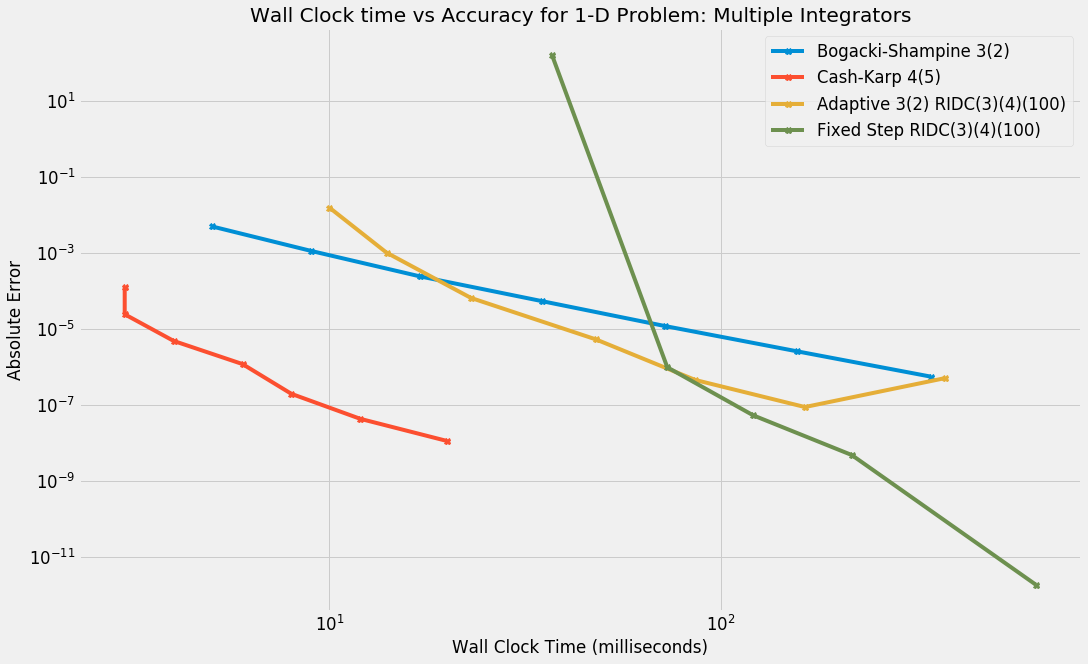

In [10]:
fig, ax = plt.subplots()
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
labels = {
    'bogacki32': "Bogacki-Shampine 3(2)", 
    'cash_karp45': "Cash-Karp 4(5)", 
    'RIDC(3)(4)[100]': "Adaptive 3(2) RIDC(3)(4)(100)", 
    'RIDC_F(3)(4)[100]': "Fixed Step RIDC(3)(4)(100)",
         }
for integ in data: 
    
    ax.plot(data[integ]['times'], data[integ]['accs'], '-X', label=labels[integ])

ax.legend()
ax.set_xlabel("Wall Clock Time (milliseconds)")
ax.set_ylabel("Absolute Error")
ax.set_title("Wall Clock time vs Accuracy for 1-D Problem: Multiple Integrators")
    

In [11]:
data_adaptive_order = {
    'RIDC(3)(1)[100]':{'times':[], 'accs':[]}, 
    'RIDC(3)(2)[100]':{'times':[], 'accs':[]}, 
    'RIDC(3)(3)[100]':{'times':[], 'accs':[]}, 
    'RIDC(3)(4)[100]':{'times':[], 'accs':[]},
    'RIDC(3)(6)[100]':{'times':[], 'accs':[]},
}

data_fixed_order = {
    'RIDC_F(3)(1)[100]':{'times':[], 'accs':[]}, 
    'RIDC_F(3)(2)[100]':{'times':[], 'accs':[]}, 
    'RIDC_F(3)(3)[100]':{'times':[], 'accs':[]}, 
    'RIDC_F(3)(4)[100]':{'times':[], 'accs':[]},
    'RIDC_F(3)(6)[100]':{'times':[], 'accs':[]}, 
}

for row in df.iterrows(): 
    try:
        if row[1][2] != 0:
            data_adaptive_order[row[1][0].strip()]['times'].append(row[1][1])
            data_adaptive_order[row[1][0].strip()]['accs'].append(row[1][2])
    except KeyError: 
        try: 
            data_fixed_order[row[1][0].strip()]['times'].append(row[1][1])
            data_fixed_order[row[1][0].strip()]['accs'].append(row[1][2])
        except KeyError:
            continue
            
datas = (data_adaptive_order, data_fixed_order)

# Varying Order of Correction

Text(0.5, 0.98, 'Wall Clock time vs accuracy for RIDC integrators of different correction order')

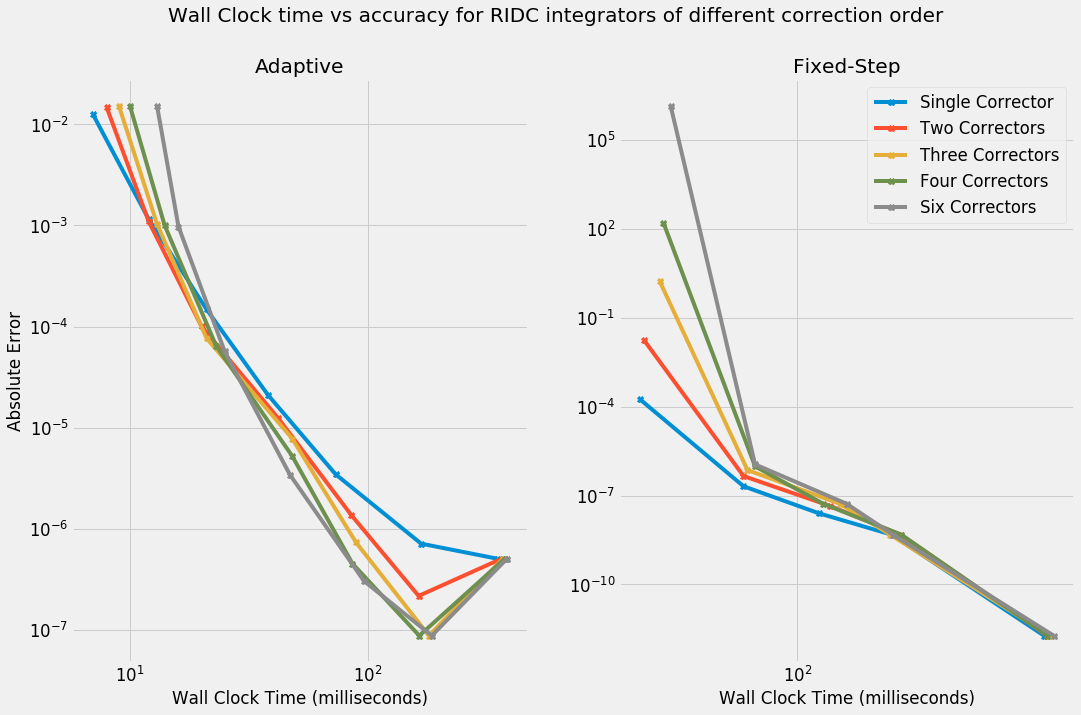

In [12]:
fig, axs = plt.subplots(1, 2)
for ax in axs: 
    ax.set_xscale("log", nonposx='clip')
    ax.set_yscale("log", nonposy='clip')

labs = (
    {
        'RIDC(3)(1)[100]': "Single Corrector", 
        'RIDC(3)(2)[100]': "Two Correctors", 
        'RIDC(3)(3)[100]': "Three Correctors", 
        'RIDC(3)(4)[100]': "Four Correctors", 
        'RIDC(3)(6)[100]': "Six Correctors", 
    }, 
    {
        'RIDC_F(3)(1)[100]': "Single Corrector", 
        'RIDC_F(3)(2)[100]': "Two Correctors", 
        'RIDC_F(3)(3)[100]': "Three Correctors",     
        'RIDC_F(3)(4)[100]': "Four Correctors", 
        'RIDC_F(3)(6)[100]': "Six Correctors",
    }
)

titles = ("Adaptive", "Fixed-Step")

for i in range(2): 
    d = datas[i]
    ax = axs[i]
    labels = labs[i]
    
    for integ in d: 
        ax.plot(d[integ]['times'], d[integ]['accs'], '-X', label=labels[integ])
    
    if i == 0: 
        ax.set_ylabel("Absolute Error")
        
    ax.set_xlabel("Wall Clock Time (milliseconds)")
    
    ax.set_title(titles[i])
    
ax.legend()

plt.suptitle("Wall Clock time vs accuracy for RIDC integrators of different correction order", size=20)
   

# Varying Stopping time:

In [211]:
df2_adaptive = pd.read_csv('one_d_test_2_adaptive.csv', header=None)
df2_fixed = pd.read_csv('one_d_test_2_fixed.csv', header=None)

In [212]:
data_adaptive_restart = {'restart':[], 'time':[], 'acc':[]}
data_fixed_restart = {'restart':[], 'time':[], 'acc':[]}

for row in df2_adaptive.iterrows(): 
    data_adaptive_restart['restart'].append(row[1][0])
    data_adaptive_restart['time'].append(row[1][1])
    data_adaptive_restart['acc'].append(row[1][2])
    
for row in df2_fixed.iterrows(): 
    data_fixed_restart['restart'].append(row[1][0])
    data_fixed_restart['time'].append(row[1][1])
    data_fixed_restart['acc'].append(row[1][2])

Text(0.5, 0.98, 'Accuracy and Wall Clock time for Different Steps before Restart')

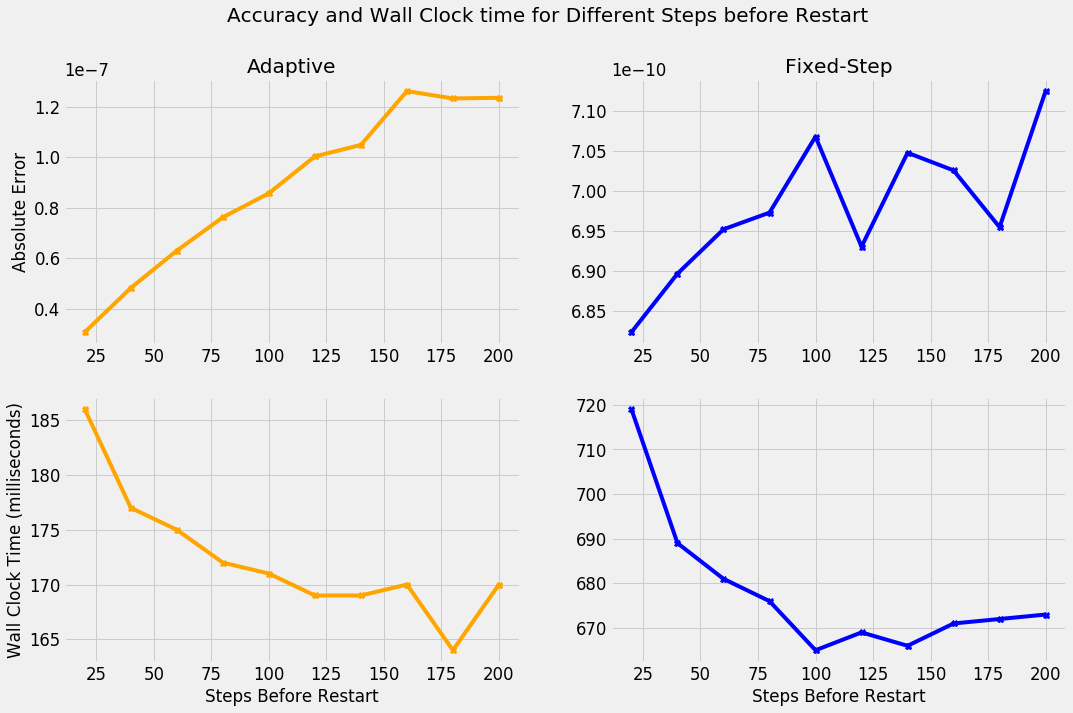

In [232]:
fig, axs = plt.subplots(2, 2)

for i in range(2): 
    for j in range(2):
        #axs[i][j].set_yscale("log", nonposy='clip')
        if i == 1: 
            axs[i][j].set_xlabel("Steps Before Restart")
        if j == 0:
            if i == 0: 
                axs[i][j].set_ylabel("Absolute Error")
            if i == 1: 
                axs[i][j].set_ylabel("Wall Clock Time (milliseconds)")
   
titles = ("Adaptive", "Fixed-Step")
datas = (data_adaptive_restart, data_fixed_restart)
colors = ['orange', 'blue']

for i in range(2):
    d = datas[i]
    axs[0][i].set_title(titles[i])
    for j in range(2): 
        if j == 0: 
            axs[j][i].plot(d['restart'], d['acc'], '-X', color=colors[i])
        else: 
            axs[j][i].plot(d['restart'], d['time'], '-X', color=colors[i])
 
    

plt.suptitle("Accuracy and Wall Clock time for Different Steps before Restart", size=20)


In [214]:
print(axs[0][1])

AxesSubplot(0.554545,0.511818;0.395455x0.368182)


In [215]:
# Varying Correctors

In [43]:
df_corrs = pd.read_csv('one_d_test_3_adaptive.csv', header=None)

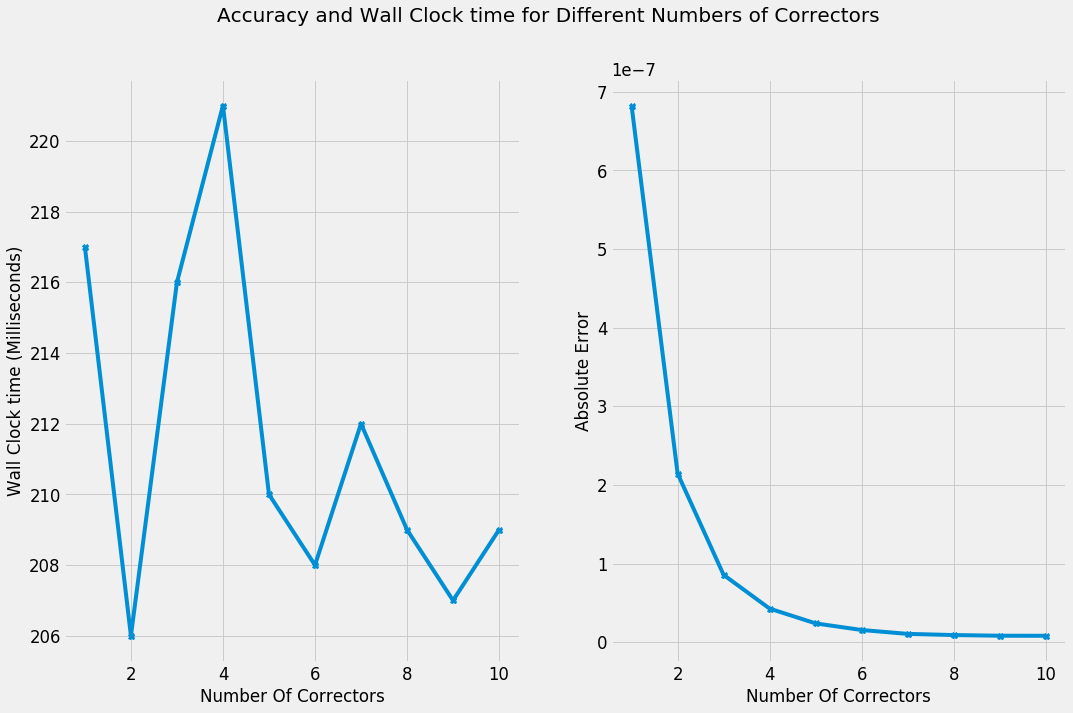

In [44]:
fig, axs = plt.subplots(1, 2)
axs[0].set_ylabel("Wall Clock time (Milliseconds)")
axs[1].set_ylabel("Absolute Error")
axs[0].set_xlabel("Number Of Correctors")
axs[1].set_xlabel("Number Of Correctors")
plt.suptitle("Accuracy and Wall Clock time for Different Numbers of Correctors", size=20)

data_adaptive_corr = {'correctors':[], 'time':[], 'acc':[]}

for row in df_corrs.iterrows(): 
    data_adaptive_corr['correctors'].append(row[1][0])
    data_adaptive_corr['time'].append(row[1][1])
    data_adaptive_corr['acc'].append(row[1][2])
    
    
for i in range(2): 
    ax = axs[i]
    if i == 0: 
        ax.plot(data_adaptive_corr['correctors'], data_adaptive_corr['time'], '-X')
    if i == 1: 
        ax.plot(data_adaptive_corr['correctors'], data_adaptive_corr['acc'], '-X')
        

# Extra Delay

In [45]:
df = pd.read_csv('one_d_test_delay.csv', header=None)

In [46]:
data = {
    'bogacki32':{'times':[], 'accs':[]}, 
    'cash_karp45':{'times':[], 'accs':[]}, 
    'RIDC(3)(4)[100]':{'times':[], 'accs':[]}, 
}

for row in df.iterrows(): 
    try:
        if row[1][2] != 0:
            data[row[1][0].strip()]['times'].append(row[1][1])
            data[row[1][0].strip()]['accs'].append(row[1][2])
    except KeyError: 
        continue

Text(0.5, 1.0, 'Wall Clock time vs Accuracy for 1-D Problem: Multiple Integrators w/ Delay')

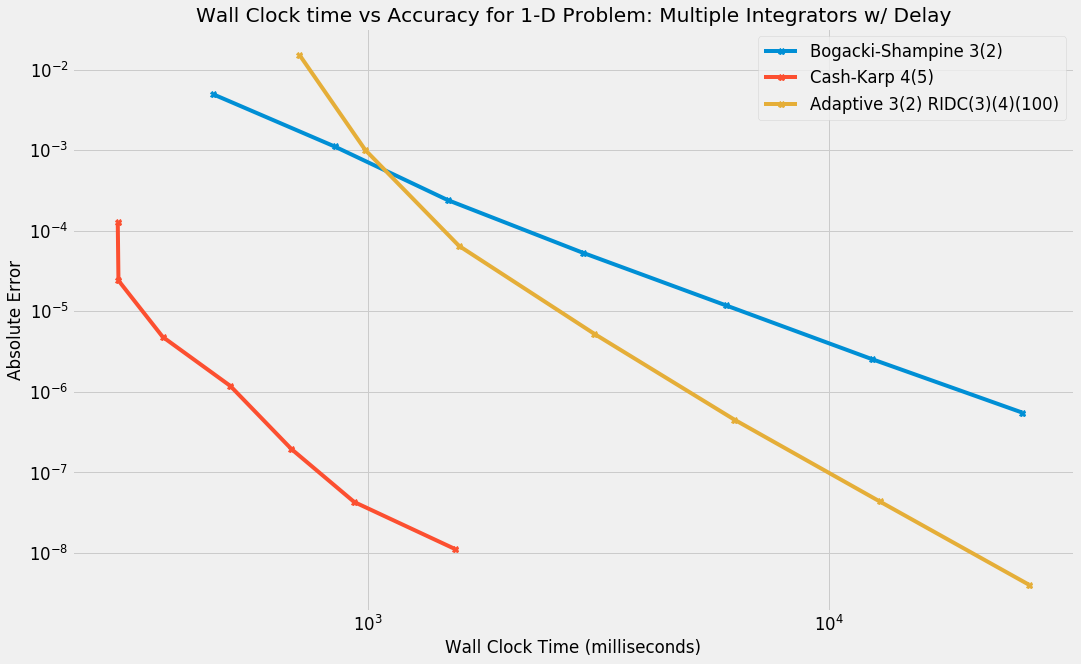

In [16]:
fig, ax = plt.subplots()
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
labels = {
    'bogacki32': "Bogacki-Shampine 3(2)", 
    'cash_karp45': "Cash-Karp 4(5)", 
    'RIDC(3)(4)[100]': "Adaptive 3(2) RIDC(3)(4)(100)", 
         }
for integ in data: 
    
    ax.plot(data[integ]['times'], data[integ]['accs'], '-X', label=labels[integ])

ax.legend()
ax.set_xlabel("Wall Clock Time (milliseconds)")
ax.set_ylabel("Absolute Error")
ax.set_title("Wall Clock time vs Accuracy for 1-D Problem: Multiple Integrators w/ Delay")

# PROBLEM 2

In [15]:
df_2 = pd.read_csv('two_d_test_1.csv', header=None)

In [16]:
data = {
    'bogacki32':{'times':[], 'accs':[]}, 
    'RIDC(3)(4)[100]':{'times':[], 'accs':[]}, 
}

for row in df_2.iterrows(): 
    try:
        if row[1][2] != 0:
            data[row[1][0].strip()]['times'].append(row[1][1])
            data[row[1][0].strip()]['accs'].append(row[1][2])
    except KeyError: 
        continue

Text(0.5, 1.0, 'Wall Clock time vs Accuracy for 2-D Problem: Multiple Integrators')

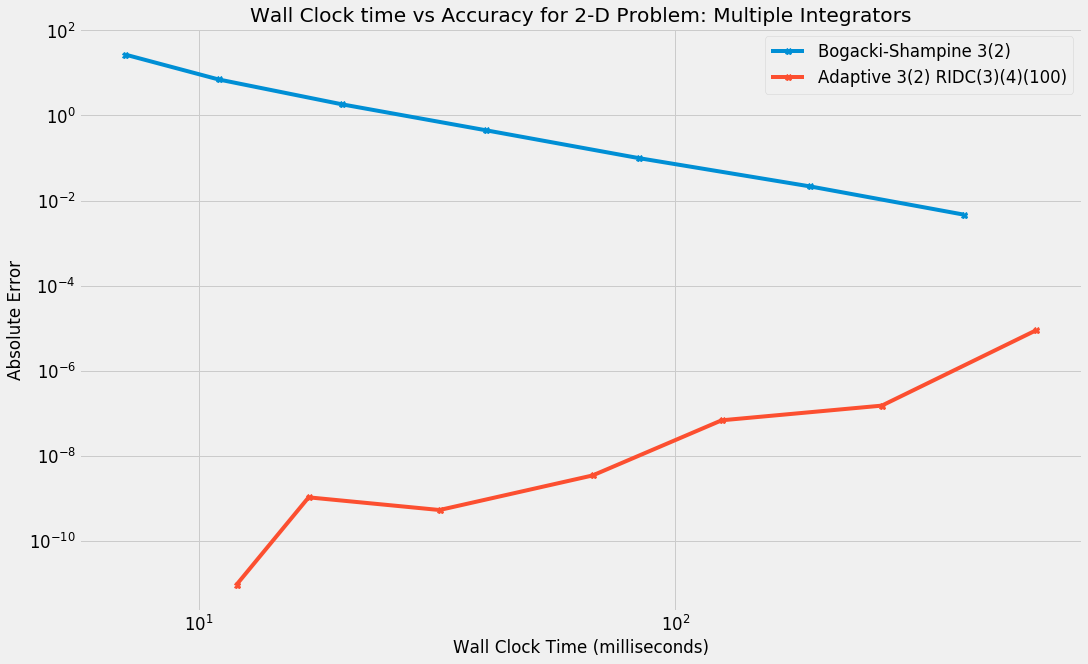

In [17]:
fig, ax = plt.subplots()
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
labels = {
    'bogacki32': "Bogacki-Shampine 3(2)", 
    'RIDC(3)(4)[100]': "Adaptive 3(2) RIDC(3)(4)(100)", 
         }
for integ in data: 
    
    ax.plot(data[integ]['times'], data[integ]['accs'], '-X', label=labels[integ])

ax.legend()
ax.set_xlabel("Wall Clock Time (milliseconds)")
ax.set_ylabel("Absolute Error")
ax.set_title("Wall Clock time vs Accuracy for 2-D Problem: Multiple Integrators")
    